In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [2]:
# import model
import cPickle as pkl
model = pkl.load(open('linux_nl_key2000_lr0.05_reg0.01_dim32_zdim1024-new-0-600000.p'))
wvecs = model.wvec

In [3]:
# do t-SNE with 2 dims
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2)
wvecs_tsne = tsne.fit_transform(wvecs)

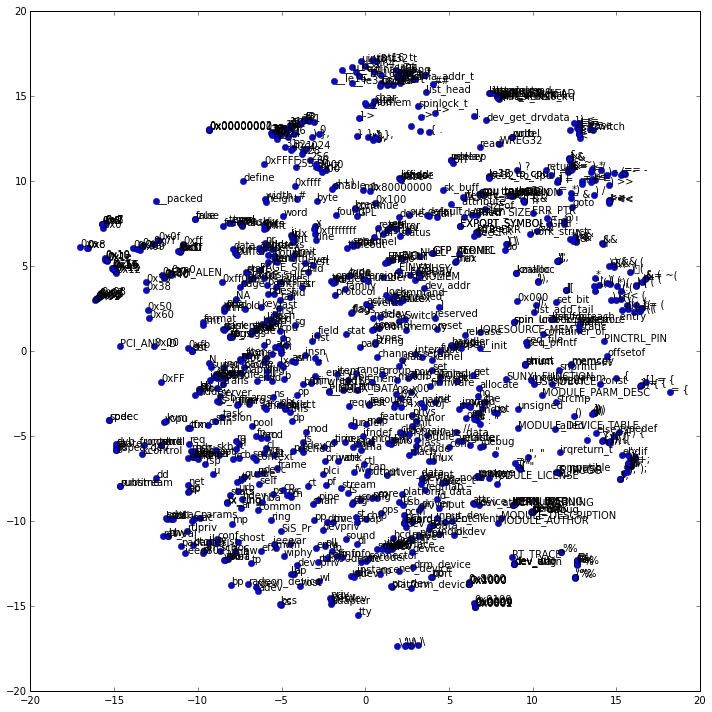

In [12]:
from mpld3 import plugins

N = 1000
fig = plt.figure(figsize=(10,10))
points = plt.plot(wvecs_tsne[:N,0], wvecs_tsne[:N,1], 'bo')
plugins.connect(fig, plugins.Zoom(enabled=True))

#labels = model.keywordList[:N]
#plugins.connect(fig, plugins.PointLabelTooltip(points[0], labels))

for i in range(N):
    plt.text(wvecs_tsne[i,0]+0.05, wvecs_tsne[i,1]+0.05, model.keywordList[i])

In [39]:
# ok let's see some differences
tok_pairs = [(('uint16_t', 'uint32_t'), ('__u16', '__u32'))]
norm_wvecs = (wvecs - np.mean(wvecs, axis=0))/np.std(wvecs, axis=0)

for tpair in tok_pairs:
    v00 = norm_wvecs[model.wordToID[tpair[0][0]]]
    v01 = norm_wvecs[model.wordToID[tpair[0][1]]]
    v10 = norm_wvecs[model.wordToID[tpair[1][0]]]
    v11 = norm_wvecs[model.wordToID[tpair[1][1]]]
    vtarg = v00-v01+v11
    print v00-v01
    print v10-v11
    dists = np.linalg.norm(norm_wvecs - vtarg, axis=1)
    mintok = np.argsort(dists)[0]
    print model.IDToWord[mintok]

[-1.59247756 -0.2736024  -0.11972788 -0.06347716 -0.87525833  0.72998857
  0.019956   -0.64838374  0.10766876  0.86548531 -0.39653683  0.26556671
 -0.72689527  0.04538727  0.5332514  -0.36023337 -0.17141114  0.53378797
  0.21513581 -0.99200082  0.05900341  0.49380827  0.96104801 -1.85303986
 -0.21155858 -0.00809014  0.23530149 -2.20396566 -0.39871407 -0.02223876
  1.14533508  1.08353543]
[ 0.95411468  0.29283512  0.44912949 -0.3326627   0.60070497 -0.03469712
  0.1968528   0.74799734 -0.79454356 -0.23299748  0.7953707  -0.29422963
 -0.68608463 -0.10816956  0.52727395  0.6095742   0.11398005  1.73319542
 -0.58370793 -0.2070471  -0.41159004  0.00787377 -0.08675325  0.09351224
 -0.00545654 -0.0760507  -0.49359357  0.2386969  -0.22530317  0.44162691
  0.81678075 -0.40922832]
__u32
